<a href="https://colab.research.google.com/github/rofiqohfifi28/PCVKGenap_2023/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

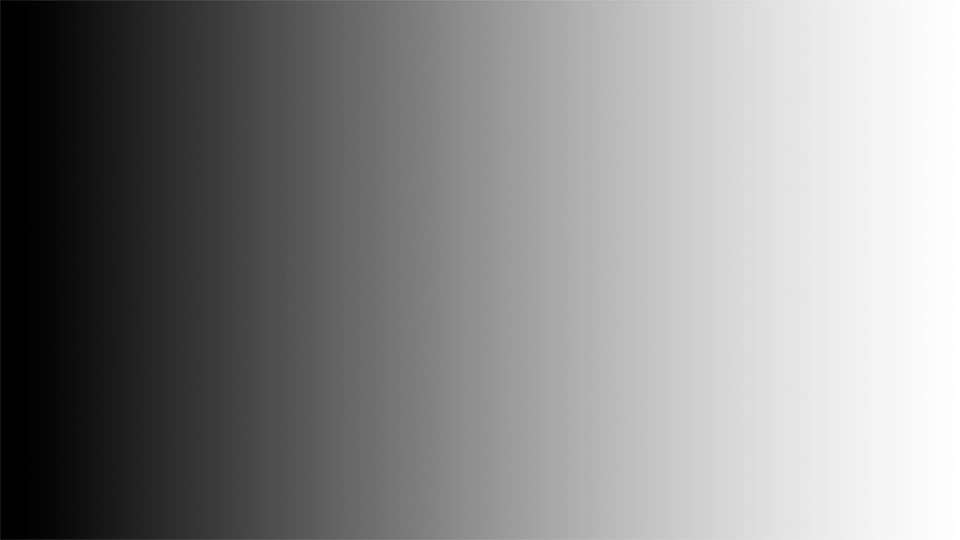

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
cv2_imshow(img)

Menggunakan Library cv2.threshold pada CV2

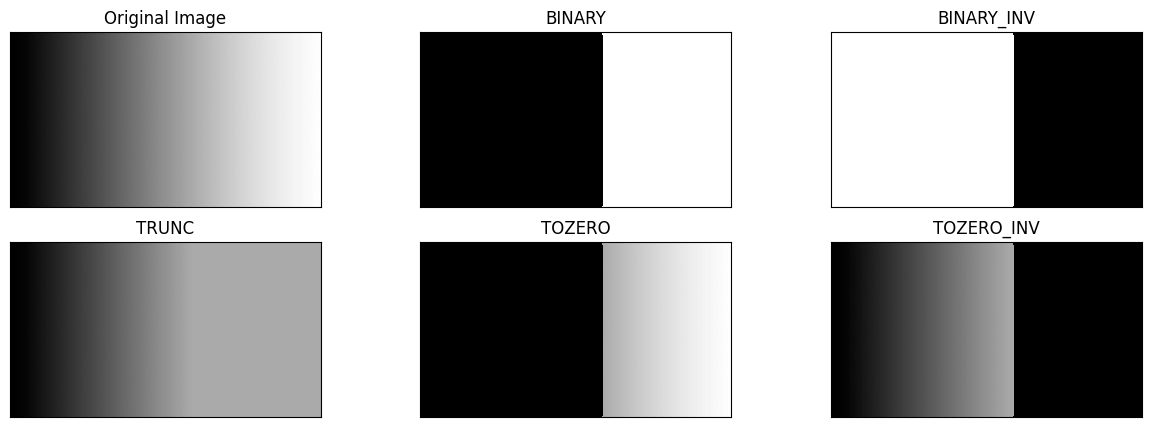

In [ ]:
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>170, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse, maka thresh2 bernilai 0(hitam) selain itu bernilai 1(putih)
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate, Jika nilai piksel img > daripada thresh maka nilai piksel dalam thresh3 ke thresh, jika tidak, tetapkan ke nilai piksel asli.
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero, jika nilai pixel > thresh maka nilai pixel asli, jika tidak maka ditetapkan 0
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse, jika nilai pixel > thresh maka atur nilai pixel pada thresh5 ke 0, jika tidak maka atur nilai pixel asli
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

Tanpa Library atau Secara Manual

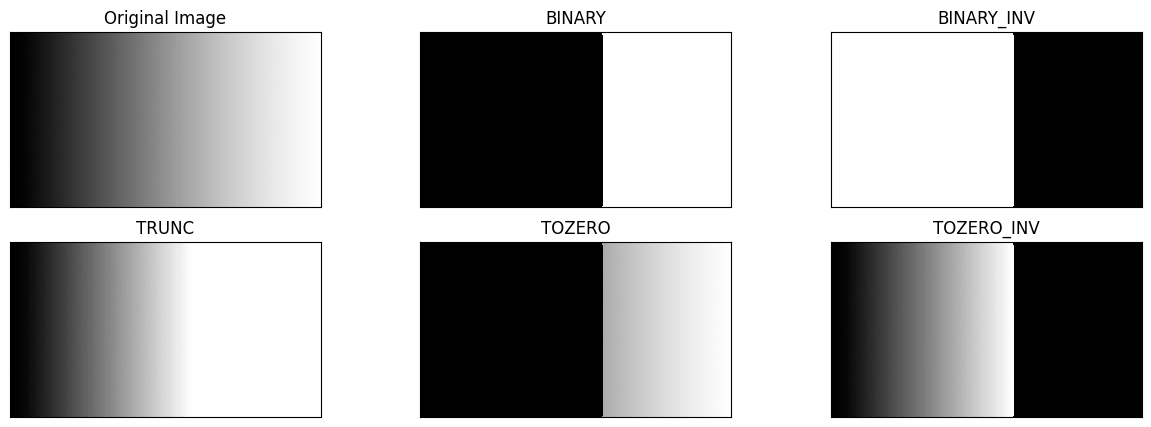

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# membuat citra hasil pengolahan dengan ukuran yang sama seperti citra asli
binary = np.zeros_like(img_gray)
binary_inv = np.zeros_like(img_gray)
trunc = np.zeros_like(img_gray)
tozero = np.zeros_like(img_gray)
tozero_inv = np.zeros_like(img_gray)

# melakukan operasi threshold secara manual
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        # BINARY
        if img_gray[i][j] > thresh:
            binary[i][j] = 255
        else:
            binary[i][j] = 0
            
        # BINARY_INV
        if img_gray[i][j] > thresh:
            binary_inv[i][j] = 0
        else:
            binary_inv[i][j] = 255
            
        # TRUNC
        if img_gray[i][j] > thresh:
            trunc[i][j] = thresh
        else:
            trunc[i][j] = img_gray[i][j]
             # TOZERO
        if img_gray[i][j] > thresh:
            tozero[i][j] = img_gray[i][j]
        else:
            tozero[i][j] = 0
            
        # TOZERO_INV
        if img_gray[i][j] > thresh:
            tozero_inv[i][j] = 0
        else:
            tozero_inv[i][j] = img_gray[i][j]

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

Otsu Thresholding tanpa menggunakan Library.

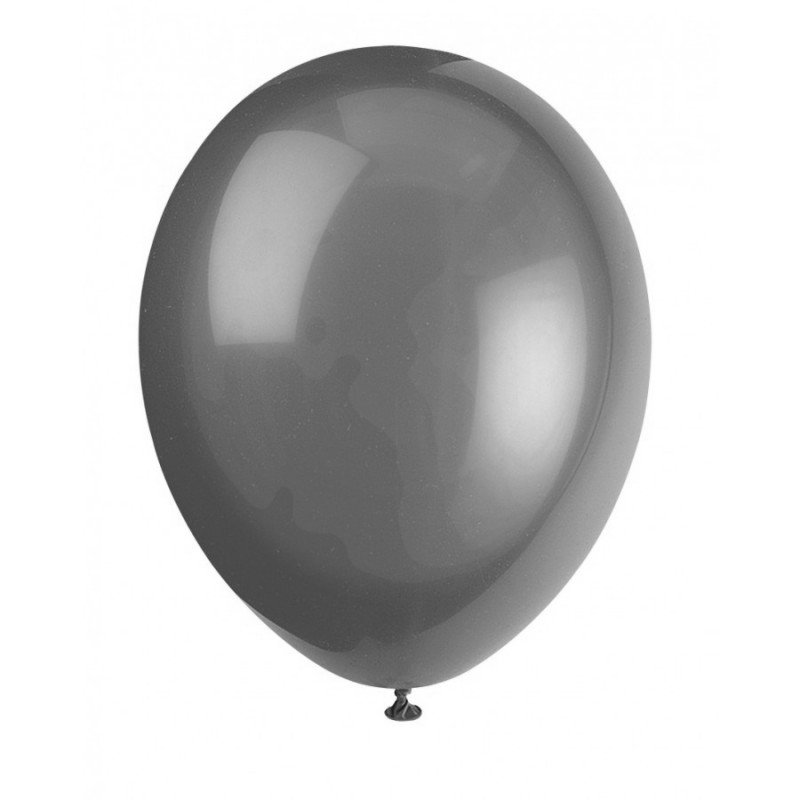

In [ ]:
balloon_gray = cv.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg',0)
cv2_imshow(balloon_gray)

<ipython-input-11-a2c38174cce5>:17: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

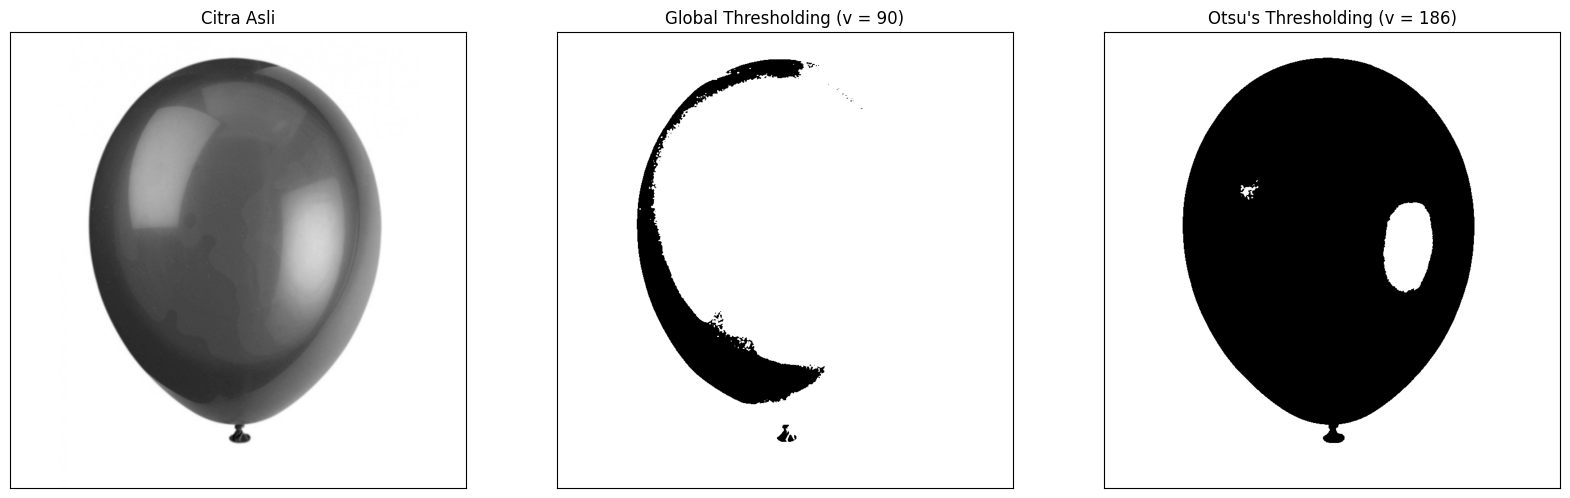

In [ ]:
# menghitung nilai threshold menggunakan Otsu Thresholding secara manual
balloon_gray = cv. GaussianBlur (balloon_gray, (5,5),0)

histogrm = cv.calcHist([balloon_gray],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,187):
  wb += histogrm[i] 
  wf = (balloon_gray.shape[0]*balloon_gray.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(balloon_gray, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (balloon_gray, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x] 
citra3 = [balloon_gray, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()
          